In [96]:
import numpy as np
import pandas as pd

In [97]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b


In [98]:
def linear_loss(X,y,w,b):
    '''
    输入:
    X：输入变量矩阵
    y：输出标签向量
    w：变量参数权重矩阵
    b：偏差项
    输出：
    y_hat：线性模型预测输出
    loss：均方损失值
    dw：权重参数一阶偏导
    db：偏差项一阶偏导
    '''
    num_train=X.shape[0]
    num_feature=X.shape[1]
    y_hat=np.dot(X,w)+b
    loss=np.sum((y_hat-y)**2)/num_train
    dw=np.dot(X.T,(y_hat-y))/num_train
    db=np.sum((y_hat-y))/num_train
    return y_hat,loss,dw,db

In [99]:
def linear_train(X,y,learning_rate=0.01,epochs=10000):
    '''
    IN:
    X: Input value matrix
    y: Output label vector
    epochs: iteration times of training
    
    OUT:
    loss_his: MSE per iteration
    params: optimized dict{} of params
    grads: optimized dict{} of params of gradient
    '''
    loss_his=[]
    w,b=initialize_params(X.shape[1])
    for i in range(1,epochs):
        y_hat, loss, dw, db = linear_loss(X, y, w, b)
        # 基于梯度下降的参数更新
        w += -learning_rate * dw
        b += -learning_rate * db
        # 记录当前迭代的损失
        loss_his.append(loss)
        # 每1000次迭代打印当前损失信息
        if i % 1000==0:
            print('epoch %d loss %f' % (i, loss))
        # 将当前迭代步优化后的参数保存到字典
        params = {
            'w': w,
            'b': b
        }
        # 将当前迭代步的梯度保存到字典
        grads = {
            'dw': dw,
            'db': db
        }     
    return loss_his,params,grads

In [100]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [101]:
from sklearn.datasets import load_diabetes
from sklearn.utils import shuffle
diabe = load_diabetes()
data, target = diabe.data, diabe.target
X, y = shuffle(data, target, random_state=13)

offset = int(X.shape[0]*0.8)
X_train,y_train=X[:offset],y[:offset]
X_test,y_test=X[offset:],y[offset:]
#改为列向量，压缩
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

# print("X_train's shape: ", X_train.shape)
# print("X_test's shape: ", X_test.shape)
# print("y_train's shape: ", y_train.shape)
# print("y_test's shape: ", y_test.shape)
print(X_train)
print(y_train)

[[-0.00551455 -0.04464164  0.05630715 ...  0.03799897  0.05078203
   0.0569118 ]
 [-0.02004471 -0.04464164 -0.08488624 ... -0.05167075 -0.08237869
  -0.04664087]
 [-0.06726771 -0.04464164 -0.05901875 ... -0.03949338  0.00200444
   0.02377494]
 ...
 [ 0.01264814 -0.04464164  0.02612841 ... -0.00259226  0.05757316
  -0.02178823]
 [ 0.07440129 -0.04464164  0.01858372 ... -0.00259226  0.05803805
  -0.05906719]
 [ 0.03444337 -0.04464164 -0.00728377 ... -0.03949338 -0.02139531
   0.00720652]]
[[272.]
 [ 90.]
 [ 86.]
 [232.]
 [281.]
 [ 88.]
 [235.]
 [151.]
 [152.]
 [ 98.]
 [ 85.]
 [270.]
 [113.]
 [263.]
 [225.]
 [178.]
 [152.]
 [275.]
 [125.]
 [167.]
 [102.]
 [ 63.]
 [ 72.]
 [ 72.]
 [150.]
 [283.]
 [ 87.]
 [200.]
 [179.]
 [ 47.]
 [259.]
 [253.]
 [129.]
 [258.]
 [132.]
 [161.]
 [178.]
 [154.]
 [144.]
 [179.]
 [ 53.]
 [140.]
 [182.]
 [ 97.]
 [292.]
 [172.]
 [ 91.]
 [ 48.]
 [116.]
 [185.]
 [170.]
 [129.]
 [104.]
 [ 85.]
 [ 97.]
 [ 84.]
 [170.]
 [ 87.]
 [186.]
 [273.]
 [230.]
 [141.]
 [134.]
 [ 9

In [102]:
loss_his, params, grads = linear_train(X_train,y_train,0.01,200000)
# 打印训练后得到模型参数


epoch 1000 loss 5209.161909
epoch 2000 loss 4913.283129
epoch 3000 loss 4662.528311
epoch 4000 loss 4449.456635
epoch 5000 loss 4267.883195
epoch 6000 loss 4112.665498
epoch 7000 loss 3979.526372
epoch 8000 loss 3864.907039
epoch 9000 loss 3765.845198
epoch 10000 loss 3679.873871
epoch 11000 loss 3604.937466
epoch 12000 loss 3539.322121
epoch 13000 loss 3481.597900
epoch 14000 loss 3430.570819
epoch 15000 loss 3385.243029
epoch 16000 loss 3344.779762
epoch 17000 loss 3308.481895
epoch 18000 loss 3275.763172
epoch 19000 loss 3246.131287
epoch 20000 loss 3219.172176
epoch 21000 loss 3194.536972
epoch 22000 loss 3171.931167
epoch 23000 loss 3151.105605
epoch 24000 loss 3131.848999
epoch 25000 loss 3113.981710
epoch 26000 loss 3097.350571
epoch 27000 loss 3081.824585
epoch 28000 loss 3067.291345
epoch 29000 loss 3053.654051
epoch 30000 loss 3040.829025
epoch 31000 loss 3028.743649
epoch 32000 loss 3017.334631
epoch 33000 loss 3006.546571
epoch 34000 loss 2996.330758
epoch 35000 loss 2986.6

In [103]:
print(params)

{'w': array([[  10.5661704 ],
       [-236.41306194],
       [ 481.51515861],
       [ 294.45947127],
       [ -60.99315051],
       [-110.54104853],
       [-206.43992196],
       [ 163.23392753],
       [ 409.28833663],
       [  65.73408722]]), 'b': 150.8145468492325}


In [104]:
def predict(X,params):
    '''
    IN:
    X: test datasets
    params: model train parameter
    
    OUT:
    y_pred: predict result
    '''
    w=params['w']
    b=params['b']
    y_pred=np.dot(X,w)+b
    return y_pred

y_pred=predict(X_test,params)
y_pred[:5]

array([[ 82.05572177],
       [167.22504283],
       [112.38551371],
       [138.15554651],
       [174.7198115 ]])

In [105]:
def r2_score(test,pred):
    avg=np.mean(test)
    sse=np.sum((test-pred)**2)
    sst=np.sum((test-avg)**2)
    R2=1-(sse/sst)
    return R2

In [106]:
print(r2_score(y_test,y_pred))

0.5334204308239403


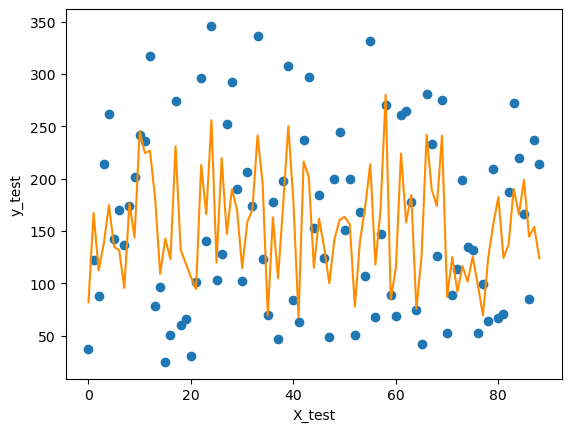

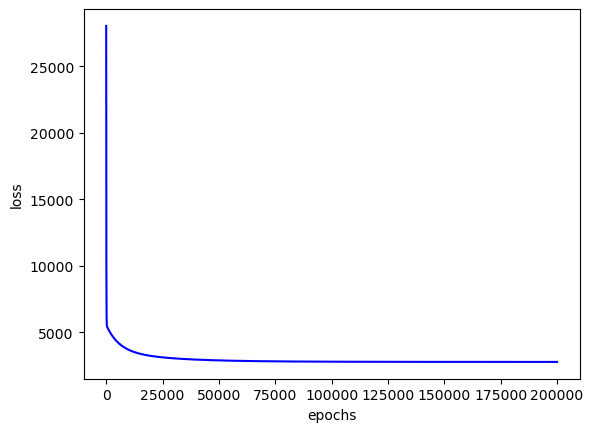

In [107]:
import matplotlib.pyplot as plt
f=X_test.dot(params['w'])+params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show()
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()